In [3]:
from __future__ import division
import sys
sys.path.append('C:\Users\XIAOYU\PycharmProjects\ND3M')
from gen_network import *
import time
import numpy as np
import matplotlib.pyplot as pl

In [4]:
def _diffuse_(G,p,q,num_of_run=25):
        if not G.is_directed():
            G = G.to_directed()

        for i in G.nodes_iter():
            G.node[i]['state'] = False
            G.node[i]['prede'] = G.predecessors(i)

        non_set = np.array(G.nodes())
        num_of_adopt = []
        for u in xrange(num_of_run):
            #获取各节点已采纳邻居数量
            len_non = len(non_set)
            influ = np.zeros(len_non)
            for i in xrange(len_non): 
                influ[i] = len([k for k in G.node[non_set[i]].get('prede',[]) if G.node[k]['state']])

            #获取本时间步采纳者数量
            prob = 1-(1-p)*(1-q)**influ
            rand = np.random.random(len_non)
            upda = rand<=prob
            num_of_adopt.append(np.sum(upda))
            #更新本时间步已采纳节点的状态
            for i in non_set[upda]:
                G.node[i]['state'] = True

            non_set = non_set[rand>prob] #更新未采纳节点集合         
        return num_of_adopt

In [48]:
def gener_data(g, p_range, q_range, path='C:/Users/XIAOYU/PycharmProjects/ND3M/'):
        g_graph = gener_random_graph(g=g, n=10000, d=6, k_list=np.arange(100))
        G = g_graph.generate()
        to_save = []
        for p in p_range:
            t1 = time.clock()
            for q in q_range:
                diff_cont = []
                for i in xrange(20):
                    diff = _diffuse_(G,p,q,num_of_run=40)
                    diff_cont.append(diff)
                mean_diff = np.mean(diff_cont,axis=0)
                to_save.append(np.concatenate(([p,q],mean_diff)))
            print 'p:%s,time elapsed:%.2f s'%(p,time.clock()-t1)
            print '================================'
        np.save(path+'%s_diff'%g, to_save)
        return to_save

### 1. one分布
>p: np.arange(0.001, 0.021, 0.001), q: np.arange(0.04, 0.21, 0.005)   20*34

In [30]:
n = 10000
g = 'one'
d = 6
k_list = np.arange(1,100)
g_graph = gener_random_graph(n,d,k_list,g)
G = g_graph.generate()

12 628


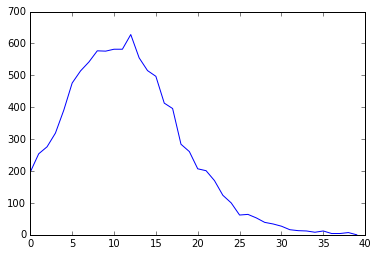

In [27]:
p, q = 0.021,0.04
diff = _diffuse_(G, p, q, num_of_run=40)
pl.plot(diff)
print np.argmax(diff), np.max(diff)

In [ ]:
to_save = []
for p in np.arange(0.001, 0.021, 0.001):
    t1 = time.clock()
    for q in np.arange(0.04, 0.21, 0.005):
        diff_cont = []
        for i in xrange(20):
            diff = _diffuse_(G,p,q,num_of_run=40)
            diff_cont.append(diff)

        mean_diff = np.mean(diff_cont,axis=0)
        to_save.append(np.concatenate(([p,q],mean_diff)))
        
    print 'p:%s,time elapsed:%.2f s'%(p,time.clock()-t1)
    print '================================'

np.save('C:\Users\XIAOYU\PycharmProjects\ND3M\%s_diff'%g,to_save)

p:0.001,time elapsed:388.46 s
p:0.002,time elapsed:377.19 s

## 2. exponential分布
>p: np.arange(0.001, 0.021, 0.001), q: np.arange(0.04, 0.15, 0.005)   20*22

In [49]:
g = 'expon'
p_range = np.arange(0.001, 0.021, 0.001)
q_range = np.arange(0.04, 0.15, 0.005)
db2 = gener_data(g, p_range, q_range)

p:0.001,time elapsed:254.59 s
p:0.002,time elapsed:237.04 s
p:0.003,time elapsed:231.45 s
p:0.004,time elapsed:227.89 s
p:0.005,time elapsed:232.08 s
p:0.006,time elapsed:221.61 s
p:0.007,time elapsed:219.92 s
p:0.008,time elapsed:218.51 s
p:0.009,time elapsed:217.50 s
p:0.01,time elapsed:220.26 s
p:0.011,time elapsed:221.81 s
p:0.012,time elapsed:222.09 s
p:0.013,time elapsed:235.95 s
p:0.014,time elapsed:223.25 s
p:0.015,time elapsed:217.99 s
p:0.016,time elapsed:215.06 s
p:0.017,time elapsed:214.03 s
p:0.018,time elapsed:211.82 s
p:0.019,time elapsed:208.28 s
p:0.02,time elapsed:207.75 s


## 3. Gaussian分布
>p: np.arange(0.001, 0.021, 0.001), q: np.arange(0.04, 0.15, 0.005)   20*22

In [50]:
g = 'gauss'
p_range = np.arange(0.001, 0.021, 0.001)
q_range = np.arange(0.04, 0.15, 0.005)
db3 = gener_data(g, p_range, q_range)

p:0.001,time elapsed:247.00 s
p:0.002,time elapsed:239.63 s
p:0.003,time elapsed:235.10 s
p:0.004,time elapsed:231.60 s
p:0.005,time elapsed:229.51 s
p:0.006,time elapsed:227.39 s
p:0.007,time elapsed:225.81 s
p:0.008,time elapsed:224.00 s
p:0.009,time elapsed:223.54 s
p:0.01,time elapsed:221.55 s
p:0.011,time elapsed:220.47 s
p:0.012,time elapsed:219.32 s
p:0.013,time elapsed:218.49 s
p:0.014,time elapsed:217.63 s
p:0.015,time elapsed:216.30 s
p:0.016,time elapsed:215.52 s
p:0.017,time elapsed:214.63 s
p:0.018,time elapsed:214.31 s
p:0.019,time elapsed:213.53 s
p:0.02,time elapsed:212.74 s
